# Blob-level Analysis

In [13]:
x=list()
classes=c("integer","character","numeric","integer","integer")
for(i in 0:2){
    path=paste("../data/blobs/bsample.sltcd.",i,"y",sep="")
    x[[i+1]]=read.table(path,sep=";",colClasses=classes,na.strings=c("null"))
}
names(x)=c("All","1y","2y")

In [23]:
for(i in 1:3){
    names(x[[i]])=c("s","l","t","c","d")
    x[[i]]$c=as.logical(x[[i]]$c)
    x[[i]]$b=is.na(x[[i]]$s)
}    

In [24]:
tmp=list()
for(i in 1:3) {
    tmp[[i]]=names(table(x[[i]]$l)[table(x[[i]]$l)>100000])
}
tmp2=intersect(intersect(tmp[[1]],tmp[[2]]),tmp[[3]])
for(i in 1:3) {
    x[[i]]$ll=as.factor(ifelse(((x[[i]]$l %in% tmp2) & (x[[i]]$l != "null") & (x[[i]]$l != "Unknown")),
                     as.character(x[[i]]$l), "Other"))
}
ty=names(table(x[[i]]$ll))

## Variables

- s: Size 
- l: Language
- t: Time 
- c: Is copied
- d: Downstream projects
- b: Is binary

In [26]:
for(i in 1:3) {
    print(names(x)[i])
    print(summary(x[[i]]))
}

[1] "All"
       s                  l                   t                 c            
 Min.   :        2   Length:122668368   Min.   :0.000e+00   Mode :logical    
 1st Qu.:      553   Class :character   1st Qu.:1.489e+09   FALSE:114191192  
 Median :     1358   Mode  :character   Median :1.553e+09   TRUE :8477176    
 Mean   :    16637                      Mean   :1.531e+09                    
 3rd Qu.:     4144                      3rd Qu.:1.597e+09                    
 Max.   :613836533                      Max.   :8.951e+09                    
 NA's   :27398022                                                            
       d                b                   ll          
 Min.   :     0.0   Mode :logical    Other   :76340563  
 1st Qu.:     0.0   FALSE:95270346   JS      :18162569  
 Median :     0.0   TRUE :27398022   java    : 5727418  
 Mean   :     1.5                    C       : 4126564  
 3rd Qu.:     0.0                    Markdown: 3887356  
 Max.   :863568.0       

### 1. What fraction of blobs are copied?

In [27]:
for(i in 1:3) {
    print(c(names(x)[i],sum(x[[i]]$c)/dim(x[[i]])[1]))
    print(c("Binaries excluded:",sum(x[[i]][!x[[i]]$b,"c"])/dim(x[[i]][!x[[i]]$b,])[1]))
}

[1] "All"                "0.0691064545669997"
[1] "Binaries excluded:" "0.0633983002433937"
[1] "1y"                 "0.0614612341053134"
[1] "Binaries excluded:" "0.0568222332892975"
[1] "2y"                 "0.0758498980189842"
[1] "Binaries excluded:" "0.0703809751872513"


### 2. Does the propensity to copy vary with language?

In [28]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(c ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                   Df  Sum Sq Mean Sq F value Pr(>F)    
ll                 21   32024  1524.9   26569 <2e-16 ***
Residuals   111460968 6397464     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                  Df  Sum Sq Mean Sq F value Pr(>F)    
ll                21   33032  1572.9   22565 <2e-16 ***
Residuals   84636809 5899730     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 2.1. Which languages are different?

In [29]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"c"],x[[i]][x[[i]]$ll!=l,"c"])
        if(test$p.value<sv){
            mean=sum(x[[i]][x[[i]]$ll==l,"c"])/dim(x[[i]][x[[i]]$ll==l,])[1]
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"                "0.13247575671542" "t: 427.762915"   
[1] "CSS"                "0.0600209492330253" "t: -6.313934"      
[1] "Cs"                 "0.0535597530852168" "t: -50.682979"     
[1] "Fml"                "0.0665055831847612" "t: 8.366666"       
[1] "Go"                 "0.0676721571740425" "t: 16.688648"      
[1] "JS"                 "0.0454613563374903" "t: -323.544157"    
[1] "Kotlin"            "0.025943061789138" "t: -122.991248"   
[1] "Markdown"           "0.0319865798047435" "t: -316.557567"    
[1] "ObjectiveC"         "0.0727411039821064" "t: 24.990494"      
[1] "Other"              "0.0623895418770649" "t: 52.436575"      
[1] "PY"                 "0.0544774489144131" "t: -48.208890"     
[1] "R"                  "0.0855873728624931" "t: 39.251335"      
[1] "Rust"               "0.0556607054750754" "t: -12.593480"     
[1] "Scala"              "0.0306845674939291" "t: -84.235546"     
[1] "Sql"                "0.0573553387472549" "t: -7.792719"  

In [73]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~ll, data=x[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ ll, family = binomial, data = x[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6124  -0.3589  -0.3589  -0.3318   2.7025  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  -1.879244   0.001484 -1265.91   <2e-16 ***
llCSS        -0.871920   0.004325  -201.59   <2e-16 ***
llCs         -0.992666   0.003437  -288.79   <2e-16 ***
llFml        -0.762405   0.009832   -77.54   <2e-16 ***
llGo         -0.743766   0.006095  -122.02   <2e-16 ***
llJS         -1.165122   0.001908  -610.58   <2e-16 ***
llKotlin     -1.746322   0.011520  -151.60   <2e-16 ***
llMarkdown   -1.530686   0.003360  -455.63   <2e-16 ***
llObjectiveC -0.666082   0.006866   -97.02   <2e-16 ***
llOther      -0.830693   0.001566  -530.62   <2e-16 ***
llPY         -0.974707   0.003204  -304.20   <2e-16 ***
llR          -0.489500   0.008002   -61.17   <2e-16 ***
llRust       -0.951967   0.008896  -107.01   <2e-16 ***
llScala      -1

### 3. Are binary blobs more likely to be copied?

In [32]:
for(i in 2:3) {
    print(names(x)[i])
    test=t.test(x[[i]][x[[i]]$b,"c"],x[[i]][!x[[i]]$b,"c"])
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  x[[i]][x[[i]]$b, "c"] and x[[i]][!x[[i]]$b, "c"]
t = 351.37, df = 36289558, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02065332 0.02088503
sample estimates:
 mean of x  mean of y 
0.07759141 0.05682223 

[1] "2y"

	Welch Two Sample t-test

data:  x[[i]][x[[i]]$b, "c"] and x[[i]][!x[[i]]$b, "c"]
t = 332.06, df = 26998008, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02477441 0.02506860
sample estimates:
 mean of x  mean of y 
0.09530248 0.07038098 



### 4. Are copied blobs smaller?

In [68]:
for(i in 2:3) {
    print(names(x)[i])
    test=t.test(log(x[[i]][x[[i]]$c,"s"]),log(x[[i]][!x[[i]]$c,"s"]))
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  log(x[[i]][x[[i]]$c, "s"]) and log(x[[i]][!x[[i]]$c, "s"])
t = -222.22, df = 5528798, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1731598 -0.1701320
sample estimates:
mean of x mean of y 
 7.167717  7.339363 

[1] "2y"

	Welch Two Sample t-test

data:  log(x[[i]][x[[i]]$c, "s"]) and log(x[[i]][!x[[i]]$c, "s"])
t = -199.3, df = 5348321, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1608797 -0.1577463
sample estimates:
mean of x mean of y 
 7.142075  7.301388 



#### 4.1. Is this the case for all languages?

In [72]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(log(x[[i]][x[[i]]$ll==l&x[[i]]$c,"s"]),log(x[[i]][x[[i]]$ll==l&!x[[i]]$c,"s"]))
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"             "t: 216.836513"
[1] "CSS"          "t: -3.504343"
[1] "Cs"               "Not significant!"
[1] "Fml"              "Not significant!"
[1] "Go"           "t: 24.338372"
[1] "JS"            "t: -62.877606"
[1] "Kotlin"        "t: -14.695897"
[1] "Markdown"      "t: -59.064043"
[1] "ObjectiveC"  "t: 7.621318"
[1] "Other"          "t: -411.342656"
[1] "PY"           "t: 21.424793"
[1] "R"            "t: -7.713302"
[1] "Rust"         "t: -7.192477"
[1] "Scala"        "t: 14.646112"
[1] "Sql"           "t: -12.622829"
[1] "Swift"        "t: -5.014679"
[1] "TypeScript"    "t: -38.828616"
[1] "ipy"          "t: -8.096101"
[1] "java"          "t: 138.465030"
[1] "php"          "t: 39.226481"
[1] "pl"          "t: 9.605817"
[1] "rb"            "t: -11.782498"
[1] "2y"
[1] "C"             "t: 195.919272"
[1] "CSS"           "t: -11.883050"
[1] "Cs"           "t: 12.552948"
[1] "Fml"              "Not significant!"
[1] "Go"           "t: 15.571693"
[1] "JS"            

### 5. How does copied blob size vary by language?

In [77]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(log(x[[i]][x[[i]]$ll==l&x[[i]]$c,"s"]),log(x[[i]][x[[i]]$ll!=l&x[[i]]$c,"s"]))
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"             "t: 430.065883"
[1] "CSS"          "t: 16.767712"
[1] "Cs"            "t: -71.571913"
[1] "Fml"          "t: 28.472888"
[1] "Go"           "t: 44.259773"
[1] "JS"            "t: -74.732750"
[1] "Kotlin"        "t: -54.411311"
[1] "Markdown"       "t: -119.852303"
[1] "ObjectiveC"   "t: 26.558239"
[1] "Other"          "t: -147.564042"
[1] "PY"           "t: 55.977217"
[1] "R"            "t: -8.458414"
[1] "Rust"         "t: 11.225385"
[1] "Scala"       "t: 4.302427"
[1] "Sql"           "t: -17.591699"
[1] "Swift"         "t: -20.128318"
[1] "TypeScript"     "t: -125.288529"
[1] "ipy"          "t: 94.713083"
[1] "java"         "t: 73.951802"
[1] "php"          "t: 14.729941"
[1] "pl"           "t: 66.825540"
[1] "rb"             "t: -162.257621"
[1] "2y"
[1] "C"             "t: 437.152911"
[1] "CSS"          "t: 24.273218"
[1] "Cs"            "t: -47.621574"
[1] "Fml"          "t: 31.228449"
[1] "Go"           "t: 37.711196"
[1] "JS"            "t: -72.376004

In [76]:
for(i in 2:3){
    print(names(x)[i])
    lm=lm(log(s)~ll, data=x[[i]][x[[i]]$c,])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = log(s) ~ ll, data = x[[i]][x[[i]]$c, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5976 -0.9978 -0.0750  0.8504 11.6753 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.983915   0.002248 3550.88   <2e-16 ***
llCSS        -0.698296   0.006788 -102.87   <2e-16 ***
llCs         -1.074533   0.005395 -199.16   <2e-16 ***
llFml        -0.419604   0.015435  -27.18   <2e-16 ***
llGo         -0.512227   0.009551  -53.63   <2e-16 ***
llJS         -0.941447   0.002947 -319.48   <2e-16 ***
llKotlin     -1.511654   0.018471  -81.84   <2e-16 ***
llMarkdown   -1.496486   0.005320 -281.28   <2e-16 ***
llObjectiveC -0.588948   0.010735  -54.86   <2e-16 ***
llOther      -0.930680   0.002483 -374.85   <2e-16 ***
llPY         -0.592180   0.005021 -117.93   <2e-16 ***
llR          -0.887724   0.012432  -71.41   <2e-16 ***
llRust       -0.675751   0.014042  -48.12   <2e-16 ***
llScala      -0.751394   0.019796  -37.96   <2e-16 *

### 6. Are older blobs more likely to be copied?

In [84]:
tx=list()
for(i in 1:3){
    tx[[i]]=x[[i]][x[[i]]$t>0,]
}

In [85]:
for(i in 2:3){
    print(names(x)[i])
    test=t.test(tx[[i]][tx[[i]]$c,"t"],tx[[i]][!tx[[i]]$c,"t"])
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  tx[[i]][tx[[i]]$c, "t"] and tx[[i]][!tx[[i]]$c, "t"]
t = -867.19, df = 7273636, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -42239886 -42049382
sample estimates:
 mean of x  mean of y 
1482549129 1524693763 

[1] "2y"

	Welch Two Sample t-test

data:  tx[[i]][tx[[i]]$c, "t"] and tx[[i]][!tx[[i]]$c, "t"]
t = -767.29, df = 6928871, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -37307358 -37117248
sample estimates:
 mean of x  mean of y 
1461595409 1498807712 



In [86]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~t, data=tx[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ t, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4779  -0.3685  -0.3285  -0.3032   2.5281  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.022e+00  5.322e-03     568   <2e-16 ***
t           -3.813e-09  3.555e-12   -1073   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51476230  on 111380251  degrees of freedom
Residual deviance: 50374157  on 111380250  degrees of freedom
AIC: 50374161

Number of Fisher Scoring iterations: 5

[1] "2y"

Call:
glm(formula = c ~ t, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3917  -0.4087  -0.3694  -0.3453   2.4199  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.801e+00  5.700e-03   491.4   <2e-16 ***
t           -3.572

**Plotting created and copied blobs over time**

In [ ]:
ts=list()
for(i in 2:3){
    ts[[i]]=list()
    for(j in 1:dim(tx[[i]])[1]){
        posix=as.POSIXct(tx[[i]]$t[j], origin="1970-01-01")
        period=substr(posix,1,7)
        c=tx[[i]]$c[j]
        if(is.null(ts[[i]][[period]])){
            ts[[i]][[period]]["total"]=1
            ts[[i]][[period]]["copied"]=c
        }else{
            ts[[i]][[period]]["total"]=ts[[i]][[period]]["total"]+1
            ts[[i]][[period]]["copied"]=ts[[i]][[period]]["copied"]+c
        }
    }
}
saveRDS(ts,"../data/blobs/bsample.ts.rds")

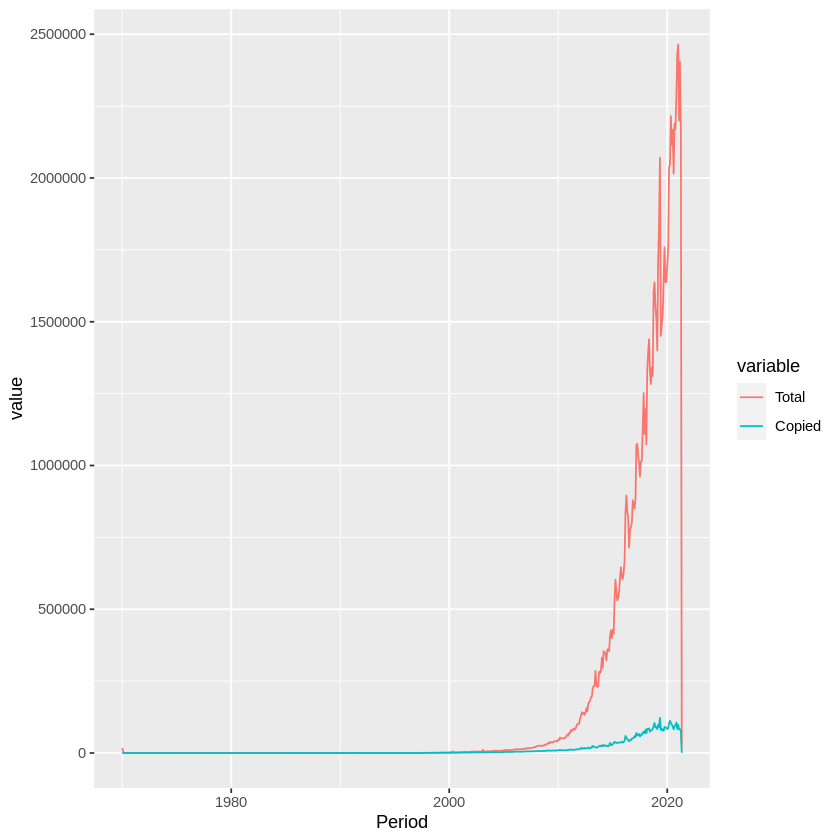

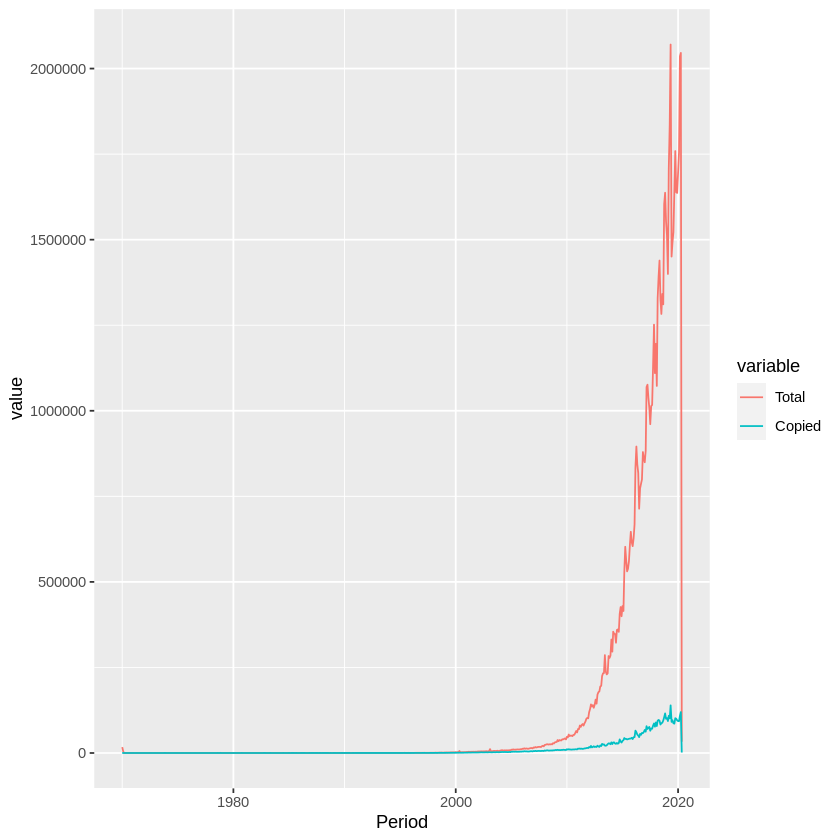

In [120]:
.libPaths(c("~/r-packages/",.libPaths()))
library(ggplot2)
library(reshape)
df=list()
for(i in 2:3){
    df[[i]]=data.frame(matrix(ncol=3, nrow=0))
    colnames(df[[i]])=c("Period","Total","Copied")
    j=1
    for(p in sort(names(ts[[i]]))){
        row=ts[[i]][[p]]
        df[[i]][j,]=c(p,row["total"],row["copied"])
        j=j+1
    }
    df[[i]][,"Period"]=as.Date(paste(df[[i]][,"Period"],"-01",sep=""))
    df[[i]][,"Total"]=as.integer(df[[i]][,"Total"])
    df[[i]][,"Copied"]=as.integer(df[[i]][,"Copied"])
    Molten <- melt(df[[i]], id.vars = "Period")
    print(ggplot(Molten, aes(x = Period, y = value, colour = variable)) + geom_line())
}

#### 6.1. Is this the case for all languages?

In [87]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(tx[[i]][tx[[i]]$ll==l&tx[[i]]$c,"t"],tx[[i]][tx[[i]]$ll==l&!tx[[i]]$c,"t"])
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"              "t: -350.828318"
[1] "CSS"           "t: -49.993496"
[1] "Cs"            "t: -75.287781"
[1] "Fml"           "t: -71.811373"
[1] "Go"            "t: -31.347104"
[1] "JS"             "t: -184.760614"
[1] "Kotlin"        "t: -14.939802"
[1] "Markdown"      "t: -72.953384"
[1] "ObjectiveC"    "t: -43.556782"
[1] "Other"          "t: -607.244046"
[1] "PY"             "t: -135.524940"
[1] "R"             "t: -58.519642"
[1] "Rust"          "t: -40.783967"
[1] "Scala"         "t: -39.920934"
[1] "Sql"           "t: -33.450154"
[1] "Swift"        "t: -3.858263"
[1] "TypeScript"    "t: -39.714780"
[1] "ipy"           "t: -12.300861"
[1] "java"           "t: -280.445886"
[1] "php"            "t: -138.726608"
[1] "pl"            "t: -49.261612"
[1] "rb"            "t: -39.958655"
[1] "2y"
[1] "C"              "t: -323.393356"
[1] "CSS"           "t: -44.837579"
[1] "Cs"            "t: -95.728045"
[1] "Fml"           "t: -68.590412"
[1] "Go"            "t: -17.276222

In [110]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        glm=glm(c~t, data=tx[[i]][tx[[i]]$ll==l,], family=binomial)
        print(l)
        print(summary(glm)$coef)
    }
}

[1] "1y"
[1] "C"
                Estimate   Std. Error   z value Pr(>|z|)
(Intercept)  3.39547e+00 1.292210e-02  262.7645        0
t           -3.69819e-09 9.156803e-12 -403.8736        0
[1] "CSS"
                 Estimate   Std. Error   z value     Pr(>|z|)
(Intercept)  1.384468e+00 7.056798e-02  19.61892 1.065917e-85
t           -2.732934e-09 4.681179e-11 -58.38132 0.000000e+00
[1] "Cs"
                 Estimate   Std. Error    z value Pr(>|z|)
(Intercept)  2.025011e+00 4.738957e-02   42.73116        0
t           -3.263299e-09 3.176937e-11 -102.71840        0
[1] "Fml"
                 Estimate   Std. Error    z value Pr(>|z|)
(Intercept)  6.297005e+00 8.678629e-02   72.55761        0
t           -6.261895e-09 6.231711e-11 -100.48437        0
[1] "Go"
                 Estimate   Std. Error   z value      Pr(>|z|)
(Intercept)  1.688092e+00 1.347764e-01  12.52513  5.440233e-36
t           -2.805339e-09 8.790957e-11 -31.91164 1.840902e-223
[1] "JS"
                 Estimate   Std. Err

In [88]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~t+ll, data=tx[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ t + ll, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5241  -0.3699  -0.3285  -0.3033   2.7965  

Coefficients:
               Estimate Std. Error  z value Pr(>|z|)    
(Intercept)   3.086e+00  5.366e-03  575.205  < 2e-16 ***
t            -3.478e-09  3.666e-12 -948.711  < 2e-16 ***
llCSS        -5.826e-01  4.362e-03 -133.571  < 2e-16 ***
llCs         -7.422e-01  3.474e-03 -213.633  < 2e-16 ***
llFml        -6.885e-01  9.948e-03  -69.214  < 2e-16 ***
llGo         -3.691e-01  6.131e-03  -60.204  < 2e-16 ***
llJS         -7.815e-01  1.991e-03 -392.478  < 2e-16 ***
llKotlin     -1.268e+00  1.154e-02 -109.878  < 2e-16 ***
llMarkdown   -1.205e+00  3.427e-03 -351.663  < 2e-16 ***
llObjectiveC -5.933e-01  6.909e-03  -85.884  < 2e-16 ***
llOther      -5.356e-01  1.638e-03 -327.016  < 2e-16 ***
llPY         -7.199e-01  3.244e-03 -221.900  < 2e-16 ***
llR          -2.535e-01  8.078e-03  -31.383  < 2e-16 

**Plotting created and copied blobs over time for each language**

In [ ]:
tsl=list()
for(i in 2:3){
    tsl[[i]]=list()
    for(l in ty){
        tsl[[i]][[l]]=list()
        data=tx[[i]][tx[[i]]$ll==l,]
        for(j in 1:dim(data)[1]){
            posix=as.POSIXct(data$t[j], origin="1970-01-01")
            period=substr(posix,1,7)
            c=data$c[j]
            if(is.null(tsl[[i]][[l]][[period]])){
                tsl[[i]][[l]][[period]]["total"]=1
                tsl[[i]][[l]][[period]]["copied"]=c
            }else{
                tsl[[i]][[l]][[period]]["total"]=tsl[[i]][[l]][[period]]["total"]+1
                tsl[[i]][[l]][[period]]["copied"]=tsl[[i]][[l]][[period]]["copied"]+c
            }
        }
        path=paste("../data/blobs/bsample.ts.",i,".",l,".rds",sep="")
        saveRDS(tsl[[i]][[l]],path)
    }
}
saveRDS(tsl,"../data/blobs/bsample.tsl.rds")